# <font color='blue'> Lecture 5: Basic Machine Learning with scikit-learn </font>

*`@prepared by Hoang Duc Thuong, Department of Space and Applications, USTH.`* 
hoang-duc.thuong@usth.edu.vn

In [1]:
import matplotlib
params = {
	'axes.labelsize': 30,
	'font.size': 28,
	'legend.fontsize': 26,
	'xtick.labelsize': 30,
	'ytick.labelsize': 30,
	'lines.linewidth': 4,
	'text.usetex': False,
	# 'figure.autolayout': True,
	'ytick.right': True,
	'xtick.top': True,

	'figure.figsize': [10, 8], # instead of 4.5, 4.5
	'axes.linewidth': 2.5,

	'xtick.major.size': 26,
	'ytick.major.size': 26,
	'xtick.minor.size': 26,
	'ytick.minor.size': 26,

	'xtick.major.width': 2.5,
	'ytick.major.width': 2.5,
	'xtick.minor.width': 2.5,
	'ytick.minor.width': 2.5,

	'xtick.major.pad': 10,
	'ytick.major.pad': 10,
	#'xtick.minor.pad': 14,
	#'ytick.minor.pad': 14,

	'xtick.direction': 'in',
	'ytick.direction': 'in',
   }
matplotlib.rcParams.update(params)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**The general picture of data science.**
<img src= "Images/data_science_picture.png">

The relationship of AI, Machine Learning, and Deep Learning. (source: https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/)
<img src= "Images/aimldl.png">

In [2]:
from IPython.display import IFrame
IFrame('https://scikit-learn.org/stable/index.html', width='100%', height=650)

**Scikit-learn** is a tool for data analysis. In general, a learning problem considers a set of N samples data and then predict unknow quantities.Learning a problem can be classified into:

- [Supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), data have additional attributes, and the problem either:
    - Classification: Identifying which category of an object belongs to. Example: Spam detection
    - Regression: Predicting an attribute associated with an object. Example: Parameter estimations, stock price prediction. <br>
    
 
- [Unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning): Training data to discover groups of similar examples.
    - Clustering: Automatic group of similar onjects into sets, example: Customer segmentation. Methods: K-means, PCA.
    - Model selection: Comparing, validating, choosing parameters and model.

---
# Python Data Science handbook

- GitHub Example from [Python Data Science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/): https://github.com/jakevdp/PythonDataScienceHandbook 

- You can find various examples in the Notebook folder or in the `Python Data Science Handbook` [appendix:](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Principal-Components-Rotation). 
- There is also GitHub for [Python for Data Analysis](https://github.com/wesm/pydata-book) book. - In addition, you can find learning courses online as https://learn.datacamp.com/ <br>

<img src= "Images/PythonDataScienceHandbook.jpg">

---
# Example: 
Clustering: [K-means]( https://scikit-learn.org/stable/modules/clustering.html#k-means)

- The K-Means algorithm clusters data by separate samples in N groups of equal variance, minimizing a criterion known as the **inertia** or within-cluster sum-of-squares.
- The K-means algorithm divides a set of $N$ samples of variable $X$ into $K$ number of clusters $C$, each cluster described by the mean $\mu_j$ (centroids) of the samples in the cluster. 
- The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares criterion**:
$$\displaystyle \sum_{i=0}^n \underbrace{ min}_{ \mu_j \in C}  (|| x_i - \mu_j ||^2)$$

- There is detail mathematic, you can have look: https://machinelearningcoban.com/2017/01/01/kmeans/ 


*In summary,* <br>
**Input**: Data $X$ and number of cluster $K$.

**Output**: Centers $M$ and label vector for each data point.

1. Select random $K$ as first centers.
2. Distribute data points to cluster that have closest center.
3. If the data distribution is stabled. The method is done.
4. Update centers for each cluster by estimate the mean again of all the data points in the current clusters after distribution step 2.
5. Redo step 2.

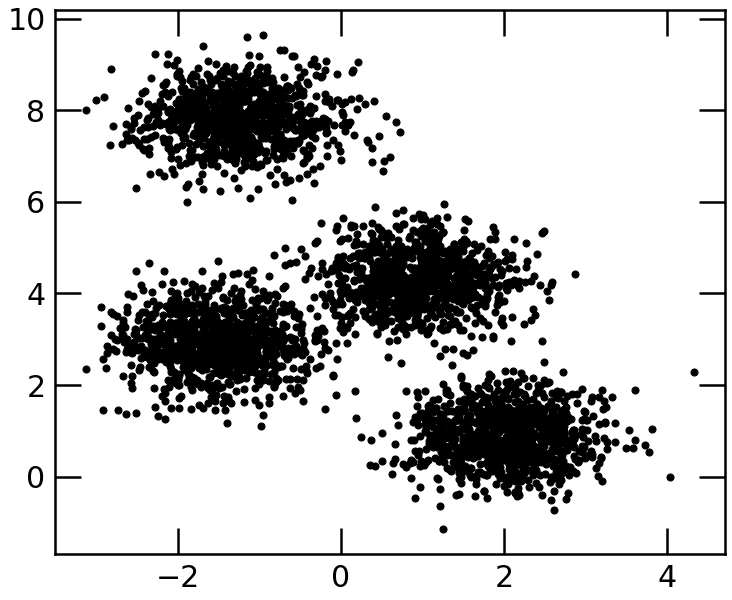

In [3]:
from sklearn.datasets import make_blobs
## Input data
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)

plt.figure(figsize=(12, 10))
plt.scatter(X[:, 0], X[:, 1], s=50, color='black');

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


[[-1.23802329  7.81533456]
 [ 0.96183057  4.29478497]
 [ 2.01811513  0.89810959]
 [-1.52380199  2.91767743]]


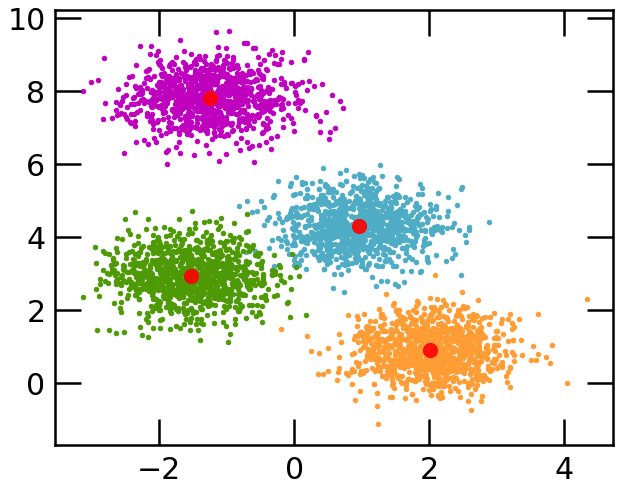

In [4]:
centers = kmeans.cluster_centers_
print(centers)

plt.figure(figsize=(10, 8))
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=80)

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9);

plt.savefig('ML_Kmeans.png',dpi=300)

We can adjust the way of data distributions, method is presented: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py 

#print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs   # data

plt.figure(figsize=(16, 12))


n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
print('X shape',X.shape)
print('Y shape',X.shape)


# Incorrect number of clusters, select randomly
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)


plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs",fontsize=26)


# An-isotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs",fontsize=26)


# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance",fontsize=26)


# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs",fontsize=26)
#plt.tight_layout()
#plt.show()